# Week 1 starting notebook

PHYS 633: Astrophysical Dynamics, January 2026

Original code by Andrew Cumming

Expansion by Patrick Horlaville

-0.09090909090909091 0.0 0.0
0.9090909090909091 0.0 0.0
<rebound.Orbit instance, a=2.1568627450980395 e=0.5363636363636364 inc=0.0 Omega=0.0 omega=0.0 f=0.0>
18.97655132331586


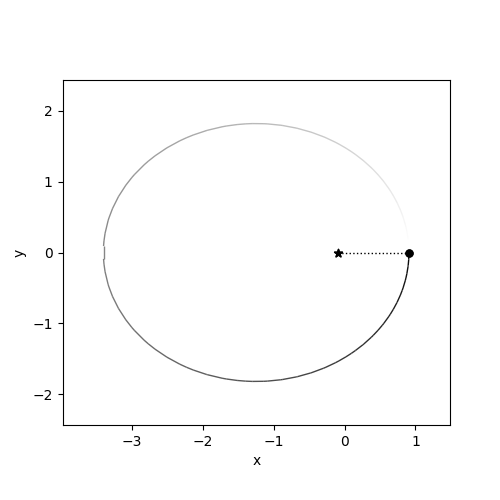

In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
import rebound
import time
import numpy as np
plt.close()

# set up the simulation
sim = rebound.Simulation()
sim.add(m=1)
sim.add(m=0.1, x=1, vy=1.3)
sim.move_to_com()

# plot the positions and instantaneous orbit
op = rebound.OrbitPlot(sim, periastron=True)

# output info about the particles and the orbit
for p in sim.particles:
    print(p.x, p.y, p.z)
for o in sim.orbits(): 
    print(o)
    print(o.P)

In [2]:
p_orb = sim.orbits()[0].P

Noutputs = 200
times = np.linspace(0, 2*p_orb, Noutputs)


# particle 2
xvec2 = np.zeros(Noutputs)
yvec2 = np.zeros(Noutputs)
xvec2[0] = sim.particles[1].x
yvec2[0] = sim.particles[1].y
op2, = plt.plot(xvec2[:1], yvec2[:1])

for i, t in enumerate(times):
    # integrate the next part of the orbit
    op.sim.integrate(t)

    # store the trajectory of particle 2 (index 1)
    xvec2[i] = sim.particles[1].x
    yvec2[i] = sim.particles[1].y

    # update the plot to animate it
    op.update() # can use updateLimits=True if you want to dynamically update the plot limits
    #op1.set_data((xvec1[:i+1],yvec1[:i+1])) # plot the trajectory so far
    op2.set_data((xvec2[:i+1],yvec2[:i+1])) # plot the trajectory so far
    time.sleep(0.001)
    op.fig.canvas.draw()

Text(0, 0.5, 'y')

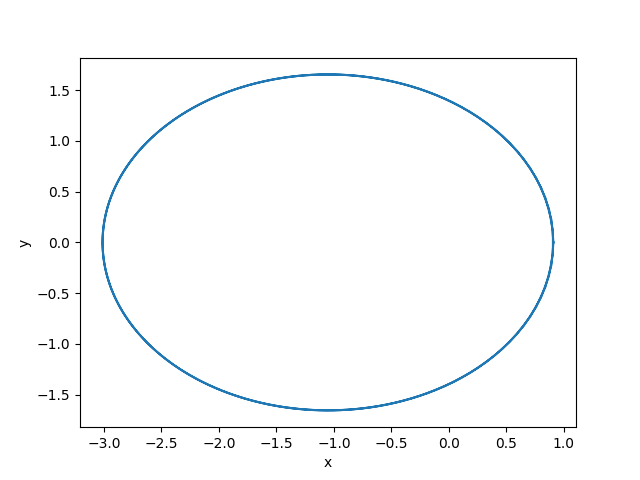

In [3]:
plt.close('all')
plt.plot(xvec2, yvec2)
plt.xlabel('x')
plt.ylabel('y')

In [4]:
# this is just a reminder that you can use help() to get info about a function's parameters
help(rebound.OrbitPlot)

Help on class OrbitPlot in module rebound.plotting:

class OrbitPlot(builtins.object)
 |  OrbitPlot(sim, fig=None, ax=None, figsize=(5, 5), projection='xy', xlim=None, ylim=None, unitlabel=None, color=False, periastron=False, orbit_style='trail', lw=1.0, particles=None, primary=None, show_primary=True, origin=None, Narc=128)
 |  
 |  Class for visualizing simulations using instantaneous orbits.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, sim, fig=None, ax=None, figsize=(5, 5), projection='xy', xlim=None, ylim=None, unitlabel=None, color=False, periastron=False, orbit_style='trail', lw=1.0, particles=None, primary=None, show_primary=True, origin=None, Narc=128)
 |      Initializer for OrbitPlot class
 |      
 |      By default each instance of OrbitPlot creates its own matplotlib figure and axes. However, you can also reuse an existing figure and axes by passing them as arguments. 
 |      
 |      Parameters
 |      ----------
 |      sim             : Simulation (required)

# Part 1.

a)

In [5]:
o.P # set orbital period

18.97655132331586

In [6]:
2*np.pi*np.sqrt(o.a**3 / 1.1) # predicted orbital period using Kepler's 3rd Law

np.float64(18.97655132331586)

In [7]:
o.P - 2*np.pi*np.sqrt(o.a**3 / 1.1) # compute the difference

np.float64(0.0)

Indeed, they are the same!

b)

0.0 0.0 0.0
1.0 0.0 0.0
<rebound.Orbit instance, a=2.1568627450980395 e=0.5363636363636364 inc=0.0 Omega=0.0 omega=0.0 f=0.0>
18.97655132331586


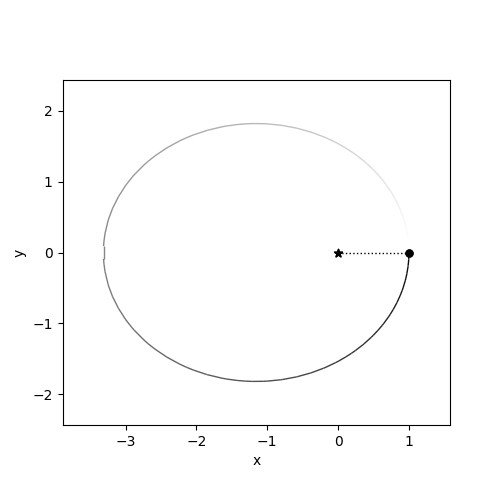

In [8]:
%matplotlib widget
import matplotlib.pyplot as plt
import rebound
import time
import numpy as np
plt.close()

# set up the simulation
sim = rebound.Simulation()
sim.add(m=1)
sim.add(m=0.1, x=1, vy=1.3)
#sim.move_to_com()

# plot the positions and instantaneous orbit
op = rebound.OrbitPlot(sim, periastron=True)

# output info about the particles and the orbit
for p in sim.particles:
    print(p.x, p.y, p.z)
for o in sim.orbits(): 
    print(o)
    print(o.P)

In [9]:
p_orb = sim.orbits()[0].P

Noutputs = 200
times = np.linspace(0, 2*p_orb, Noutputs)


# particle 2
xvec2 = np.zeros(Noutputs)
yvec2 = np.zeros(Noutputs)
xvec2[0] = sim.particles[1].x
yvec2[0] = sim.particles[1].y
op2, = plt.plot(xvec2[:1], yvec2[:1])

for i, t in enumerate(times):
    # integrate the next part of the orbit
    op.sim.integrate(t)

    # store the trajectory of particle 2 (index 1)
    xvec2[i] = sim.particles[1].x
    yvec2[i] = sim.particles[1].y

    # update the plot to animate it
    op.update() # can use updateLimits=True if you want to dynamically update the plot limits
    #op1.set_data((xvec1[:i+1],yvec1[:i+1])) # plot the trajectory so far
    op2.set_data((xvec2[:i+1],yvec2[:i+1])) # plot the trajectory so far
    time.sleep(0.001)
    op.fig.canvas.draw()

Text(0, 0.5, 'y')

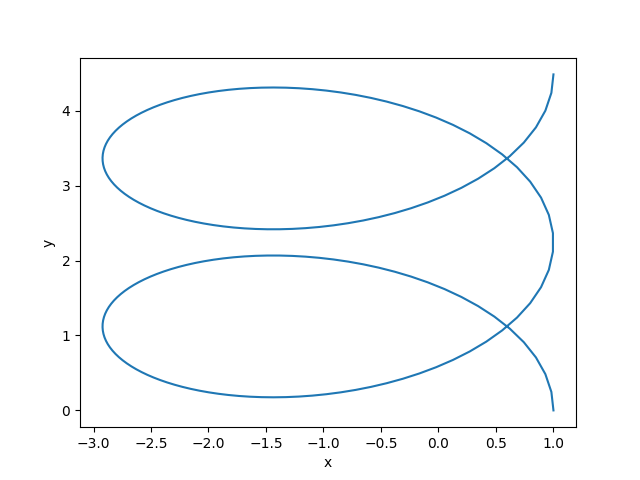

In [10]:
plt.close('all')
plt.plot(xvec2, yvec2)
plt.xlabel('x')
plt.ylabel('y')

When we move from the center of mass frame to the "still" reference frame (the one from which we define $\texttt{vy}$=1.3), then the orbital system starts moving up. That is because since we have given the secondary mass a velocity $\texttt{vy}$, the COM of the system will also have an upwards velocity $\texttt{vy}$. If we set ourselves in the COM reference frame, then we observe no upwards motion. However, if we go back to our still reference frame, we will see the system move up with an upwards velocity $\texttt{vy}$.

c)

First, let's just add the trajectories of $\vec{r}_1$ and of $\vec{r} = \vec{r}_2 - \vec{r}_1$

-0.09090909090909091 0.0 0.0
0.9090909090909091 0.0 0.0
<rebound.Orbit instance, a=2.1568627450980395 e=0.5363636363636364 inc=0.0 Omega=0.0 omega=0.0 f=0.0>
18.97655132331586


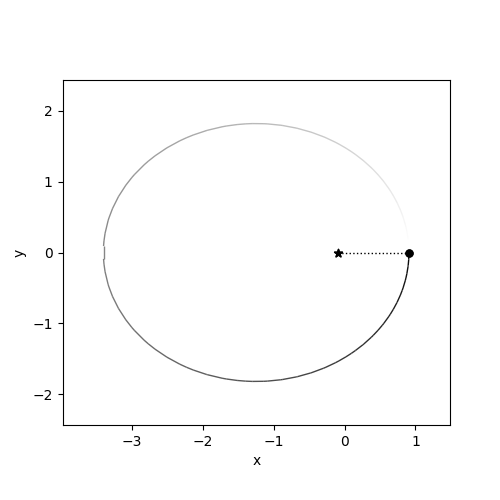

In [38]:
# set up parameters for star #1
m1 = 1 # mass
x10 = 0 # initial x position
y10 = 0 # initial y position
vx10 = 0 # initial x velocity
vy10 = 0 # initial y velocity

# set up parameters for star #2
m2 = .1 # mass
x20 = 1 # initial x position
y20 = 0 # initial y position
vx20 = 0 # initial x velocity
vy20= 1.3 # initial y velocity

# set up the simulation
sim = rebound.Simulation()
sim.add(m=m1, x=x10, y=y10, vx=vx10, vy=vy10) # first star
sim.add(m=m2, x=x20, y=y20, vx=vx20, vy=vy20) # second star
sim.move_to_com()

# plot the positions and instantaneous orbit
op = rebound.OrbitPlot(sim, periastron=True)

# output info about the particles and the orbit
for p in sim.particles:
    print(p.x, p.y, p.z)
for o in sim.orbits(): 
    print(o)
    print(o.P)

In [39]:
p_orb = sim.orbits()[0].P

Noutputs = 200
times = np.linspace(0, 2*p_orb, Noutputs)

# particle 1
xvec1 = np.zeros(Noutputs)
yvec1 = np.zeros(Noutputs)
xvec1[0] = sim.particles[0].x
yvec1[0] = sim.particles[0].y
op1, = plt.plot(xvec1[:1], yvec1[:1])

# particle 2
xvec2 = np.zeros(Noutputs)
yvec2 = np.zeros(Noutputs)
xvec2[0] = sim.particles[1].x
yvec2[0] = sim.particles[1].y
op2, = plt.plot(xvec2[:1], yvec2[:1])

# relative position between the two stars
rx = np.zeros(Noutputs)
ry = np.zeros(Noutputs)
rx[0] = xvec2[0] - xvec1[0]
ry[0] = yvec2[0] - yvec1[0]
op3, = plt.plot(rx[:1], ry[:1])

for i, t in enumerate(times):
    # integrate the next part of the orbit
    op.sim.integrate(t)

    # store the trajectory of particle 1 (index 0)
    xvec1[i] = sim.particles[0].x
    yvec1[i] = sim.particles[0].y

    # store the trajectory of particle 2 (index 1)
    xvec2[i] = sim.particles[1].x
    yvec2[i] = sim.particles[1].y

    rx[i] = xvec2[i] - xvec1[i]
    ry[i] = yvec2[i] - yvec1[i]

    # update the plot to animate it
    op.update() # can use updateLimits=True if you want to dynamically update the plot limits
    
    op1.set_data((xvec1[:i+1],yvec1[:i+1])) # plot the trajectory so far
    op2.set_data((xvec2[:i+1],yvec2[:i+1])) # plot the trajectory so far
    op3.set_data((rx[:i+1],ry[:i+1])) # plot the trajectory so far
    
    time.sleep(0.001)
    op.fig.canvas.draw()

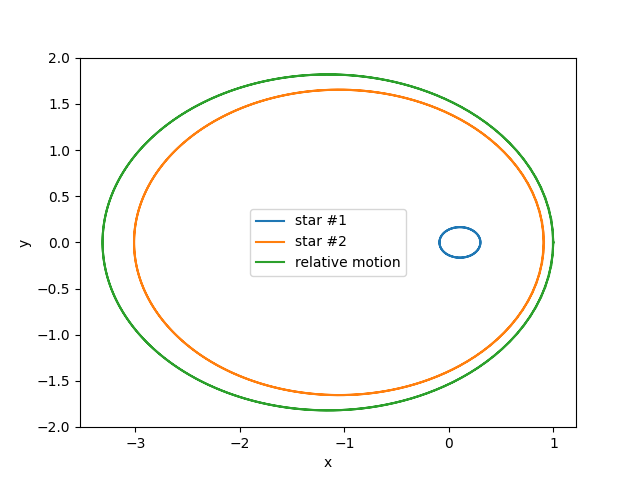

In [40]:
plt.close('all')
plt.plot(xvec1, yvec1, label='star #1')
plt.plot(xvec2, yvec2, label='star #2')
plt.plot(rx, ry, label='relative motion')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

Now, let's rescale those trajectories

In [41]:
m1_rescale = -(1 + m1/m2)
m2_rescale = 1 + m2/m1

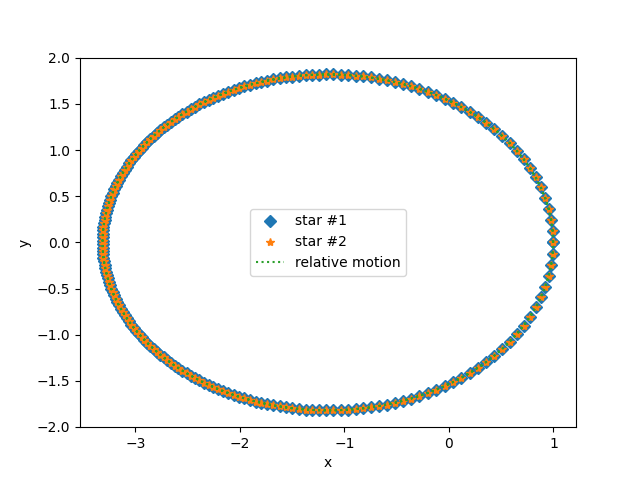

In [42]:
plt.close('all')
plt.plot(xvec1*m1_rescale, yvec1*m1_rescale, 'D', label='star #1')
plt.plot(xvec2*m2_rescale, yvec2*m2_rescale, '*', label='star #2')
plt.plot(rx, ry, ':', label='relative motion')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

They are all superimposed, as expected

(d)

Equation 2.134 tells us:

$a = (\frac{2}{R} - \frac{V^2}{m_1 + m_2})^{-1}$


and Equation 2.135 tells us:

$ e = \sqrt{1 - \frac{h^2}{a(m_1+m_2)}}$

(using $G = 1$)

Let's calculate those values and compare to our actual orbital parameters:

In [50]:
(2/1 - (1.3**2)/1.1)**(-1) # from equation 2.134; using R = 1, V = 1.3, m_1 + m_2 = 1.1

2.156862745098039

In [47]:
o.a # actual value of a

2.1568627450980395

They match!

In [52]:
np.sqrt(1 - (1.3**2)/(1.1*o.a)) # from equation 2.135; using h = xv_y = 1.3

np.float64(0.5363636363636364)

In [53]:
o.e

0.5363636363636364

They also match!

For a circular orbit, let's set $R = a$ in equation 2.134. We obtain:

$V_{\mathrm{circ}} = \sqrt{\frac{m_1 + m_2}{a}}$

Let's rerun the orbit with it:

In [64]:
v_circ = np.sqrt(1.1/1)
print(v_circ)

1.0488088481701516


-0.09090909090909091 0.0 0.0
0.9090909090909091 0.0 0.0
<rebound.Orbit instance, a=1.0 e=0.0 inc=0.0 Omega=0.0 omega=0.0 f=0.0>
5.99078213169331


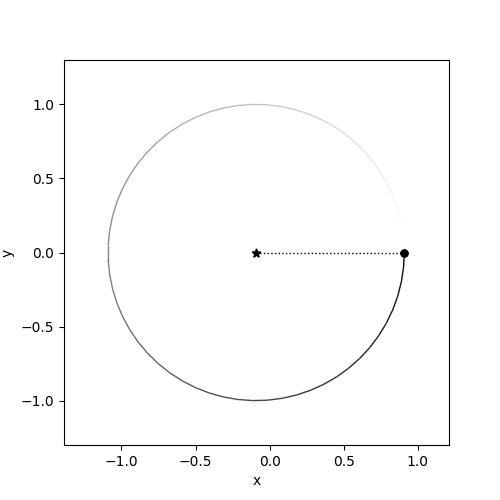

In [66]:
# set up parameters for star #1
m1 = 1 # mass
x10 = 0 # initial x position
y10 = 0 # initial y position
vx10 = 0 # initial x velocity
vy10 = 0 # initial y velocity

# set up parameters for star #2
m2 = .1 # mass
x20 = 1 # initial x position
y20 = 0 # initial y position
vx20 = 0 # initial x velocity
vy20= v_circ # initial y velocity

# set up the simulation
sim = rebound.Simulation()
sim.add(m=m1, x=x10, y=y10, vx=vx10, vy=vy10) # first star
sim.add(m=m2, x=x20, y=y20, vx=vx20, vy=vy20) # second star
sim.move_to_com()

# plot the positions and instantaneous orbit
op = rebound.OrbitPlot(sim, periastron=True)

# output info about the particles and the orbit
for p in sim.particles:
    print(p.x, p.y, p.z)
for o in sim.orbits(): 
    print(o)
    print(o.P)

It's indeed a circle! Or, at least, looks very much like a circle.

What if the velocity was lower?

-0.09090909090909091 0.0 0.0
0.9090909090909091 0.0 0.0
<rebound.Orbit instance, a=0.7051282051282052 e=0.41818181818181815 inc=0.0 Omega=0.0 omega=3.141592653589793 f=3.141592653589793>
3.5471998383952186


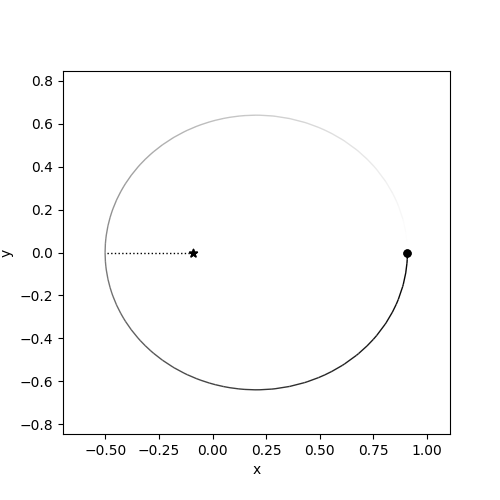

In [73]:
# set up parameters for star #1
m1 = 1 # mass
x10 = 0 # initial x position
y10 = 0 # initial y position
vx10 = 0 # initial x velocity
vy10 = 0 # initial y velocity

# set up parameters for star #2
m2 = .1 # mass
x20 = 1 # initial x position
y20 = 0 # initial y position
vx20 = 0 # initial x velocity
vy20= 0.8 # initial y velocity

# set up the simulation
sim = rebound.Simulation()
sim.add(m=m1, x=x10, y=y10, vx=vx10, vy=vy10) # first star
sim.add(m=m2, x=x20, y=y20, vx=vx20, vy=vy20) # second star
sim.move_to_com()

# plot the positions and instantaneous orbit
op = rebound.OrbitPlot(sim, periastron=True)

# output info about the particles and the orbit
for p in sim.particles:
    print(p.x, p.y, p.z)
for o in sim.orbits(): 
    print(o)
    print(o.P)

What if it was higher?

-0.09090909090909091 0.0 0.0
0.9090909090909091 0.0 0.0
<rebound.Orbit instance, a=4.583333333333325 e=0.7818181818181815 inc=0.0 Omega=0.0 omega=0.0 f=0.0>
58.78353388241861


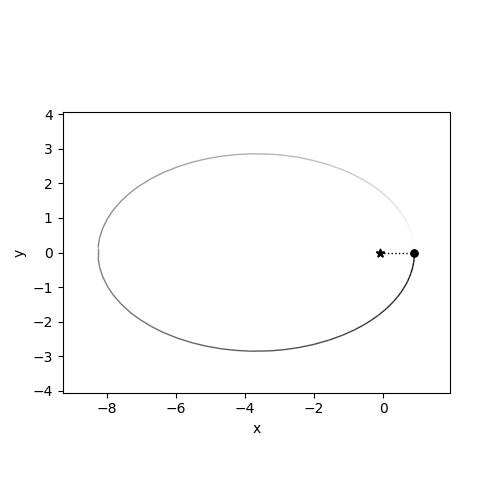

In [72]:
# set up parameters for star #1
m1 = 1 # mass
x10 = 0 # initial x position
y10 = 0 # initial y position
vx10 = 0 # initial x velocity
vy10 = 0 # initial y velocity

# set up parameters for star #2
m2 = .1 # mass
x20 = 1 # initial x position
y20 = 0 # initial y position
vx20 = 0 # initial x velocity
vy20= 1.4 # initial y velocity

# set up the simulation
sim = rebound.Simulation()
sim.add(m=m1, x=x10, y=y10, vx=vx10, vy=vy10) # first star
sim.add(m=m2, x=x20, y=y20, vx=vx20, vy=vy20) # second star
sim.move_to_com()

# plot the positions and instantaneous orbit
op = rebound.OrbitPlot(sim, periastron=True)

# output info about the particles and the orbit
for p in sim.particles:
    print(p.x, p.y, p.z)
for o in sim.orbits(): 
    print(o)
    print(o.P)

The pericenter was to the left when the velocity was lower, and to the right when it was higher. Both orbits are eccentric.

# Part 2)

1.

Let's calculate the coordinates of star #2 just as before; but we want to see what its motion is like from the guiding center ($G$) location.

The rotation of the GC is parametrized by the mean anomaly $M$, so its associated rotation transform is:

$R = \begin{bmatrix}
\cos{M} & -\sin{M}\\
\sin{M} & \cos{M}
\end{bmatrix}$

By multiplying a trajecory $\vec{r}$ by $R$, we rotate the trajectory accordingly. What we are looking for is a trajectory $r$ as seen from a rotating frame. That means that we need to multiply that trajectory by $R^{-1}$, the inverse rotation: 

$\vec{r}_1 = R^{-1} \vec{r}_0$,

where $\vec{r}_0$ is the trajectory in the initial, non-rotating frame and $\vec{r}_1$ is $\vec{r}_0$ as seen by the rotating frame. For $x, y$ coordinates, this will give us:

$x_1 = x_0 \cos{M} + y_0 \sin{M}$

$y_1 = - x_0 \sin{M} + y_0 \cos{M}$

0.0 0.0 0.0
0.8999999999999999 0.0 0.0
<rebound.Orbit instance, a=1.0000000000000002 e=0.10000000000000023 inc=0.0 Omega=0.0 omega=0.0 f=0.0>
6.283185307179588


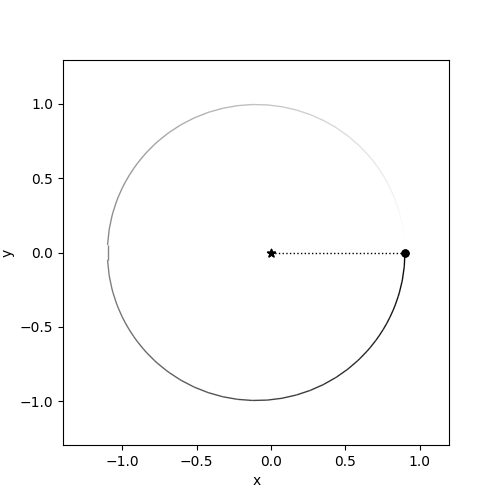

In [27]:
# set up parameters for star #1
m1 = 1 # mass
x10 = 0 # initial x position
y10 = 0 # initial y position
vx10 = 0 # initial x velocity
vy10 = 0 # initial y velocity

# set up parameters for star #2
m2 = 0.9 # mass
x20 = 1 # initial x position
y20 = 0 # initial y position
vx20 = 0 # initial x velocity
vy20= 1.3 # initial y velocity

# set up the simulation
sim = rebound.Simulation()
#sim.add(m=m1, x=x10, y=y10, vx=vx10, vy=vy10) # first star
#sim.add(m=m2, x=x20, y=y20, vx=vx20, vy=vy20) # second star
sim.add(m=1)
sim.add(m=0, a=1, e=0.1)
sim.move_to_com()

# plot the positions and instantaneous orbit
op = rebound.OrbitPlot(sim, periastron=True)

# output info about the particles and the orbit
for p in sim.particles:
    print(p.x, p.y, p.z)
for o in sim.orbits(): 
    print(o)
    print(o.P)

In [28]:
p_orb = sim.orbits()[0].P

Noutputs = 200
times = np.linspace(0, 2*p_orb, Noutputs)

n = 2*np.pi/o.P # mean motion
tau = 0 # time of pericentre passage

M = np.zeros(Noutputs)

# particle 1
xvec1 = np.zeros(Noutputs)
yvec1 = np.zeros(Noutputs)
xvec1[0] = sim.particles[0].x
yvec1[0] = sim.particles[0].y
op1, = plt.plot(xvec1[:1], yvec1[:1])

# particle 2; in the still reference frame 
xvec2 = np.zeros(Noutputs)
yvec2 = np.zeros(Noutputs)

xvec2[0] = sim.particles[1].x
yvec2[0] = sim.particles[1].y

op2, = plt.plot(xvec2[:1], yvec2[:1])


for i, t in enumerate(times):
    # integrate the next part of the orbit
    op.sim.integrate(t)

    M[i] = n*(t - tau)
    
    # store the trajectory of particle 1 (index 0)
    xvec1[i] = sim.particles[0].x
    yvec1[i] = sim.particles[0].y

    # store the trajectory of particle 2 (index 1)
    xvec2[i] = sim.particles[1].x
    yvec2[i] = sim.particles[1].y


    # update the plot to animate it
    op.update() # can use updateLimits=True if you want to dynamically update the plot limits
    
    op1.set_data((xvec1[:i+1],yvec1[:i+1])) # plot the trajectory so far
    op2.set_data((xvec2[:i+1],yvec2[:i+1])) 
    
    time.sleep(0.001)
    op.fig.canvas.draw()

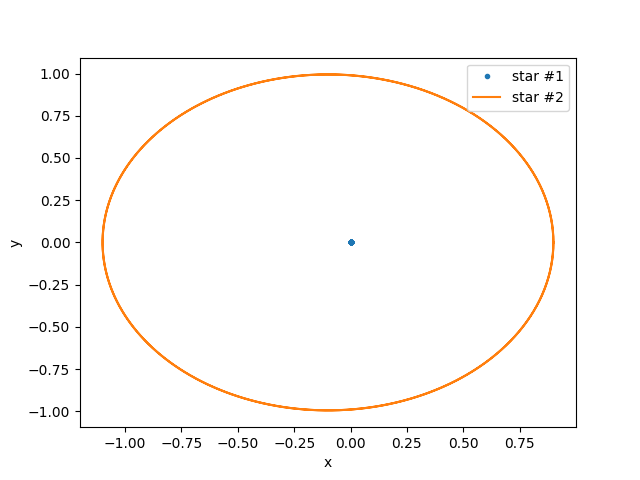

In [36]:
plt.close('all')
plt.plot(xvec1, yvec1, '.', label='star #1')
plt.plot(xvec2, yvec2, label='star #2')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

We have calculated the coordinates of the secondary star in the COM frame, $\vec{r}_0$. Now, we want to change coordinates and go to the GC coordinates. 

First, we move to the GC location, which is on a circle of radius $a$, such that:

$x_1 = x_0 - a \cos{M}$ 

$y_1 = y_0 - a \sin{M}$

In [30]:
xvec2_1 = xvec2 - o.a*np.cos(M)
yvec2_1 = yvec2 - o.a*np.sin(M)

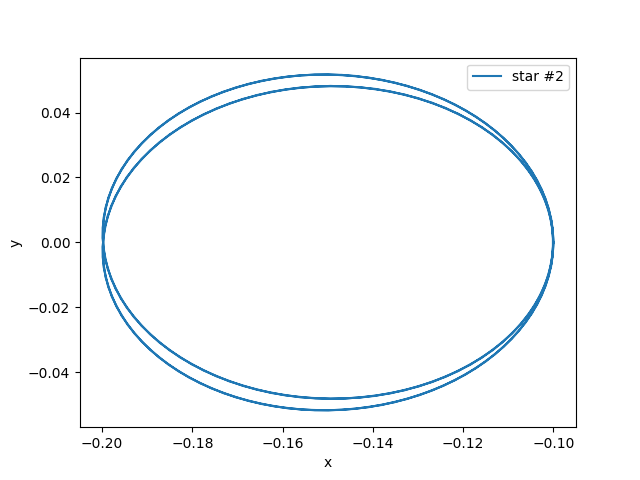

In [31]:
plt.close('all')
plt.plot(xvec2_1, yvec2_1, label='star #2')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

Finally, we do the full transfer to the GC by performing the inverse rotation

In [32]:
xvec2_2 = xvec2_1*np.cos(M) + yvec2_1*np.sin(M)
yvec2_2 = - xvec2_1*np.sin(M) + yvec2_1*np.cos(M)

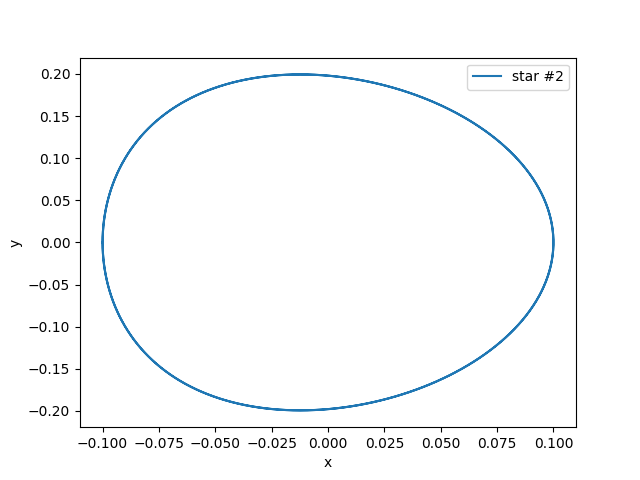

In [33]:
plt.close('all')
plt.plot(xvec2_2, yvec2_2, label='star #2')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

This is the trajectory of star #2 as seen from the GC. Let's compare it to the elliptical approximation:

In [34]:
x_ellip = -o.a*o.e*np.cos(M)
y_ellip = 2*o.a*o.e*np.sin(M)

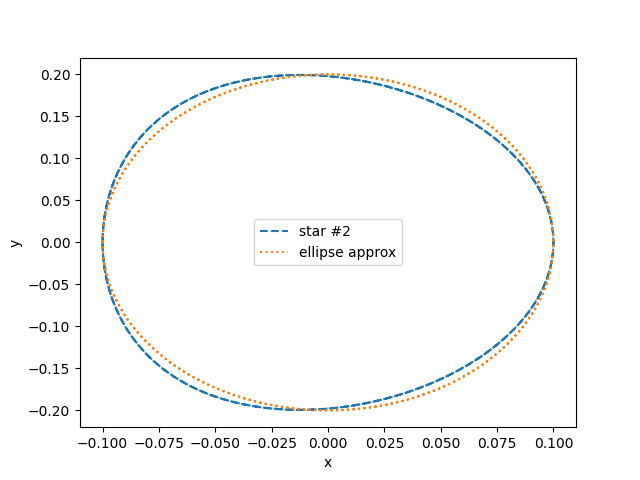

In [35]:
plt.close('all')
plt.plot(xvec2_2, yvec2_2, '--', label='star #2')
plt.plot(x_ellip, y_ellip, ':', label='ellipse approx')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

The ellipse is indeed a good approximation for the motion of star #2 as seen from the guiding center!

Notice the orbital parameters are the same as that of the given solution notebook, so as to check that the results are correct